In [8]:
import numpy as np
import torch

#### Define Inputs & Targets

In [9]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype = 'float32')

In [3]:
inputs.shape

(5, 3)

In [4]:
targets = np.array([[56, 70],
                   [81, 101],
                   [119, 133],
                   [22 , 37],
                   [103, 119]], dtype = 'float32')

In [10]:
targets.shape

(5, 2)

#### Convert to Tensors

In [11]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


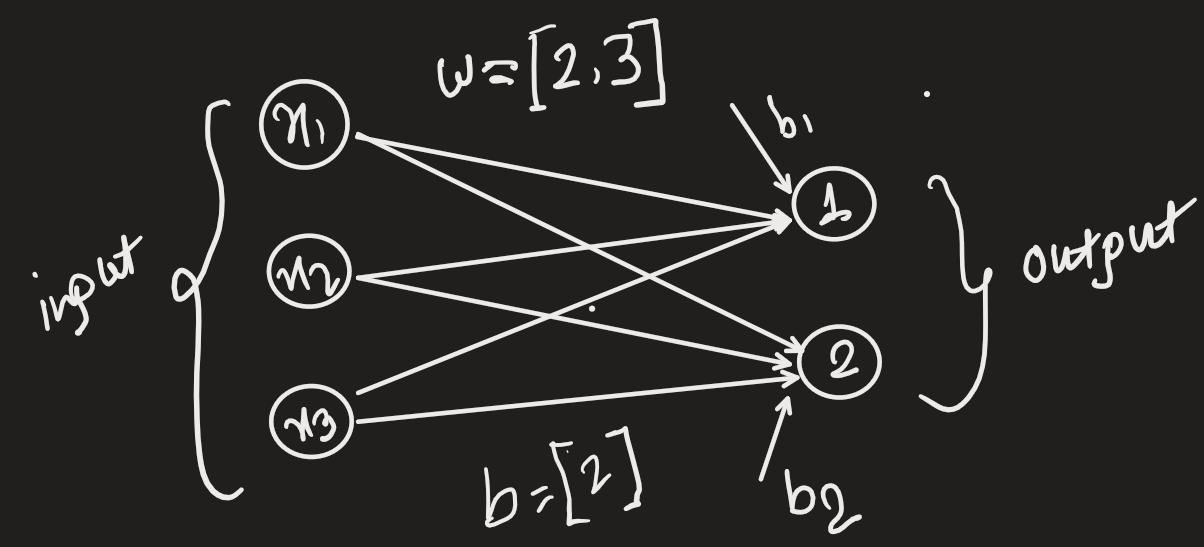

#### Initilize / Define Weights & Biases

In [12]:
w = torch.randn(2 , 3 , requires_grad=True)
b = torch.randn(2 , requires_grad=True)
print(w)
print(b)

tensor([[-0.7743, -1.1312, -0.0972],
        [ 1.4330, -1.3455, -0.0017]], requires_grad=True)
tensor([0.5232, 1.0828], requires_grad=True)


In [7]:
w.shape , b.shape

(torch.Size([2, 3]), torch.Size([2]))

#### Define the model 

In [8]:
def model(x):
    return x @ w.t() + b

#### generate predictions

In [9]:
preds = model(inputs)
preds

tensor([[ -4.0214, 207.2980],
        [-18.9979, 270.9929],
        [  9.4225, 282.3906],
        [  7.8322, 239.6041],
        [-34.8886, 242.5110]], grad_fn=<ThAddBackward>)

#### MSE loss

In [33]:
def mse(t1 , t2):
    diff = (t1 - t2)
    return torch.sum(diff * diff) / diff.numel()

PyTorch torch.numel() method returns the total number of elements in the input tensor.

#### Compute Loss

In [32]:
loss = mse(preds , targets)
loss

10


tensor(1087.9211, grad_fn=<DivBackward0>)

#### Compute Gradients

In [12]:
loss.backward()

In [13]:
# check the gradients
w.grad , b.grad

(tensor([[-6794.8096, -8270.2314, -5102.5391],
         [13535.3936, 12949.1445,  8318.0273]]), tensor([-84.3306, 156.5593]))

#### Pytorch accumulates gradients so we need to set them to zero

In [14]:
w.grad.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [15]:
b.grad.zero_()

tensor([0., 0.])

#### Gradient Descent
1. Generate Predictions
2. Calculate loss
3. Update Weights/Bias
4. Clear out gradients

In [16]:
preds = model(inputs)

In [17]:
preds.shape , targets.shape

(torch.Size([5, 2]), torch.Size([5, 2]))

In [18]:
loss = mse(preds , targets)
loss

tensor(17119.2656, grad_fn=<DivBackward0>)

In [19]:
loss.backward()

In [20]:
# Adjust weights/Biases & reset gradients
with torch.no_grad(): # not to add these operations in the computation graph
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [21]:
preds = model(inputs)
loss = mse(preds,targets)

In [22]:
loss

tensor(12012.8008, grad_fn=<DivBackward0>)

#### Running through multiple iterations and checking the loss

In [26]:
for i in range(20):
    preds = model(inputs)
    loss = mse(preds , targets)
    print(f'Epochs : {i} , Loss : {loss.item()}')
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Epochs : 0 , Loss : 1541.2352294921875
Epochs : 1 , Loss : 1460.297119140625
Epochs : 2 , Loss : 1401.1427001953125
Epochs : 3 , Loss : 1356.72509765625
Epochs : 4 , Loss : 1322.294677734375
Epochs : 5 , Loss : 1294.650146484375
Epochs : 6 , Loss : 1271.6328125
Epochs : 7 , Loss : 1251.787841796875
Epochs : 8 , Loss : 1234.1343994140625
Epochs : 9 , Loss : 1218.010498046875
Epochs : 10 , Loss : 1202.96923828125
Epochs : 11 , Loss : 1188.709228515625
Epochs : 12 , Loss : 1175.02587890625
Epochs : 13 , Loss : 1161.7818603515625
Epochs : 14 , Loss : 1148.883056640625
Epochs : 15 , Loss : 1136.265869140625
Epochs : 16 , Loss : 1123.8868408203125
Epochs : 17 , Loss : 1111.7158203125
Epochs : 18 , Loss : 1099.732177734375
Epochs : 19 , Loss : 1087.921142578125


In [24]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [27]:
preds

tensor([[ 65.4705,  82.1554],
        [ 73.5674, 107.8853],
        [123.8118,  99.5378],
        [ 69.7463, 103.6292],
        [ 58.3950,  92.7802]], grad_fn=<ThAddBackward>)